In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
# from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [10]:
# load MNIST dataset
# mnist = fetch_openml('mnist_784', version=1)
digits = load_digits()

# features (X), labels (y)
X, y = digits.data, digits.target
# mnist["data"], mnist["target"].astype(np.int8)

print(f"Dataset shape: {X.shape}")
print(f"Unique target labels: {np.unique(y)}")

Dataset shape: (1797, 64)
Unique target labels: [0 1 2 3 4 5 6 7 8 9]


In [11]:
# normalize the values [0,1]
#X = X / 255.0

# flatten for MLP
#X_train_flat, X_test_flat, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 
#print(f"Training set shape: {X_train_flat.shape}")
#print(f"Test set shape: {X_test_flat.shape}")

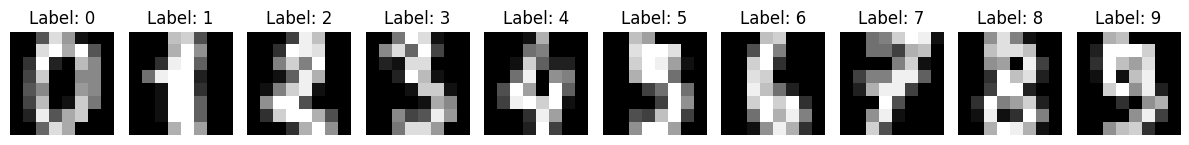

In [12]:
# visualize sample digits (first 10 digits)
fig, axes = plt.subplots(1, 10, figsize=(12, 4))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [13]:
# train/test/split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (1347, 64), Test set: (450, 64)


In [15]:
# Initialize MLPClassifier (1 hidden layer, 64 neurons)
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=300, alpha=1e-4,
                    solver='adam', verbose=True, random_state=1)

# Train the model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Accuracy score
print("Test set accuracy:", accuracy_score(y_test, y_pred))


Iteration 1, loss = 7.74547066
Iteration 2, loss = 4.45264380
Iteration 3, loss = 2.86128128
Iteration 4, loss = 1.80234398
Iteration 5, loss = 1.28223857
Iteration 6, loss = 0.91276687
Iteration 7, loss = 0.69268558
Iteration 8, loss = 0.55821758
Iteration 9, loss = 0.45450315
Iteration 10, loss = 0.38698947
Iteration 11, loss = 0.34052752
Iteration 12, loss = 0.30020714
Iteration 13, loss = 0.26907737
Iteration 14, loss = 0.24465963
Iteration 15, loss = 0.22253906
Iteration 16, loss = 0.20488231
Iteration 17, loss = 0.19089017
Iteration 18, loss = 0.17652738
Iteration 19, loss = 0.16557615
Iteration 20, loss = 0.15519965
Iteration 21, loss = 0.14794006
Iteration 22, loss = 0.13705018
Iteration 23, loss = 0.12922735
Iteration 24, loss = 0.12286057
Iteration 25, loss = 0.11572647
Iteration 26, loss = 0.10973438
Iteration 27, loss = 0.10461600
Iteration 28, loss = 0.10039398
Iteration 29, loss = 0.09560252
Iteration 30, loss = 0.08941743
Iteration 31, loss = 0.08656774
Iteration 32, los

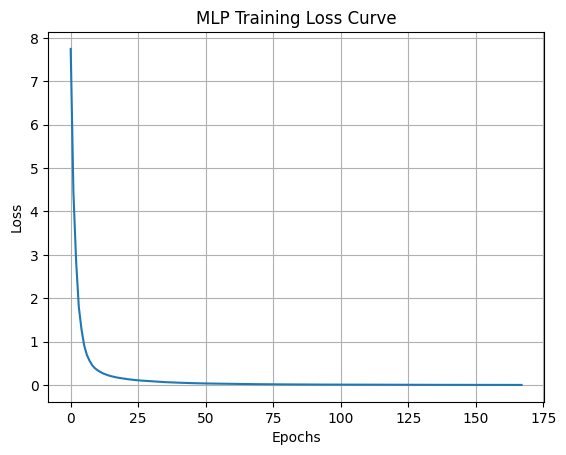

In [16]:
# Plot the training loss curve 
plt.plot(mlp.loss_curve_)
plt.title('MLP Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.95      0.95      0.95        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.98      1.00      0.99        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



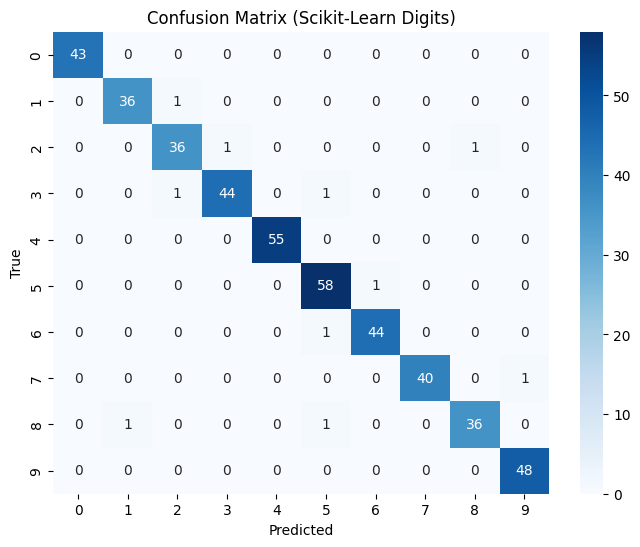

In [17]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Scikit-Learn Digits)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

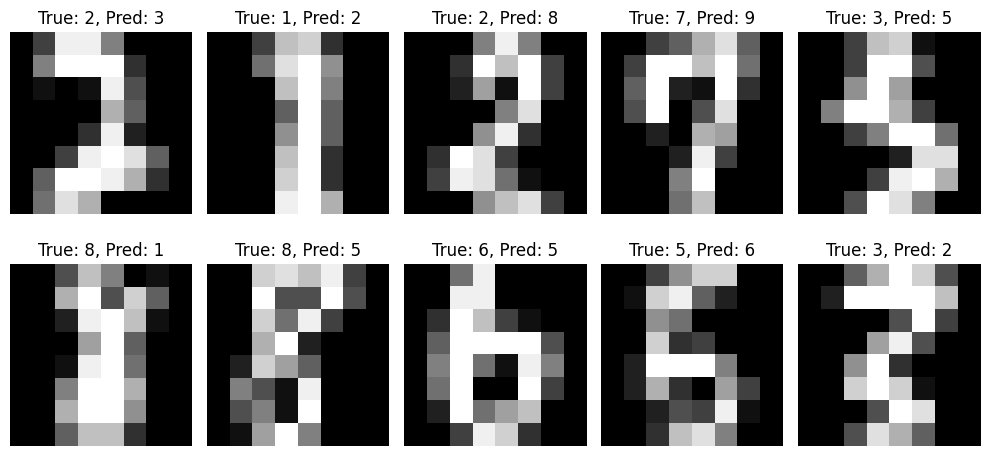

In [21]:
# Display misclassified digits
misclassified_idx = np.where(y_test != y_pred)[0]

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    idx = misclassified_idx[i]
    ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    ax.set_title(f'True: {y_test[idx]}, Pred: {y_pred[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


In [22]:
# Trying a different MLP with 2 hidden layers (128,64)
mlp_alt = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, alpha=1e-4,
                        solver='adam', random_state=1, verbose=False)

# train & evaluare
mlp_alt.fit(X_train, y_train)
print("Accuracy (128, 64) hidden layers:", accuracy_score(y_test, mlp_alt.predict(X_test)))


Accuracy (128, 64) hidden layers: 0.9844444444444445


In [23]:
# cross validation to check model stability
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Iteration 1, loss = 7.86651329
Iteration 2, loss = 4.29436200
Iteration 3, loss = 2.65109465
Iteration 4, loss = 1.65575933
Iteration 5, loss = 1.11297683
Iteration 6, loss = 0.79799039
Iteration 7, loss = 0.61299525
Iteration 8, loss = 0.49417952
Iteration 9, loss = 0.41129953
Iteration 10, loss = 0.35637572
Iteration 11, loss = 0.31498960
Iteration 12, loss = 0.27802134
Iteration 13, loss = 0.25138341
Iteration 14, loss = 0.22744308
Iteration 15, loss = 0.20824096
Iteration 16, loss = 0.19015687
Iteration 17, loss = 0.17686477
Iteration 18, loss = 0.16270551
Iteration 19, loss = 0.15161203
Iteration 20, loss = 0.14332215
Iteration 21, loss = 0.13177455
Iteration 22, loss = 0.12494001
Iteration 23, loss = 0.11842960
Iteration 24, loss = 0.11165577
Iteration 25, loss = 0.10439459
Iteration 26, loss = 0.09728352
Iteration 27, loss = 0.09278171
Iteration 28, loss = 0.08774178
Iteration 29, loss = 0.08501270
Iteration 30, loss = 0.08119107
Iteration 31, loss = 0.07624062
Iteration 32, los